<div class="alert alert-block alert-success">
 
# 🔎 Missing Values Treatment 
    
 👨‍🏫 **Vikesh K**      
 📓 **Lab 05**  

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"It does not matter how slowly you go as long as you do not stop" - Confucius** 
    </font> 💡   

   
## 📝Lab Agenda

* Missing Values
* Finding 
* Imputing missing values
 
<div/>

```{note}

Missing values is an important area of consideration when doing data analysis. First of all, the presence of missing value means that you maybe lacking important information which is crucial to take the right decisions based on the data. It could also mean something amiss in the data-collection method. We can't also build a machine learning model with missing values in the data. Hence, we need to rectify it. 
Missing value treatment like outlier treatment needs domain understanding. How should we impute a missing value, should we drop it? All of these questions necessitate that you understand the business context and the implication of these actions. 

In the notebook we will focus on different operations to deal with missing values.
```    

## Importing Modules and data

In [35]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [36]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/titanic.csv'

df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing value count

The `.isna()` function allows us to check whether the entries in the pandas dataframe are na or not. In pandas, there is an equivalent function too named - `.isnull()`. You can use either, however since the most of the imputation function of pandas use `na`, we will mainly use `isna()` to maintain continuity. 

In [37]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


The `isna()` function returns a boolean status for each of the values. `False` means that particular value is not a missing value and `True` means, there was a missing value. However this information is not actionable. We need to summarise this information, we can do that by chaining `isna()` command with the arthimetic commands - `.sum()` and `.mean()`. 


* **`df.isna().sum()`**: Counts the sum of missing values in each column of the data frame

* **`df.isna().means()`**: Counts the share of missing values in each column of the data frame

Both of these functions are important, we need to know the count of missing values. However, data size context is important. Are there 100 missing values in data with 1000 rows or 1 million rows. Hence, knowing the percentage of missing values in column becomes important. It helps us understand how severe the data quality issue is and what should be done. 

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If you want to see the output in a dataframe view, then we can use `.to_frame()`

Plus we would have to rename the column as well. Since we are going to use multiple commands, I will chain them and keep one command for each line to improve readability. For multiple line pandas command, we need to keep them in `()` 

In [39]:
(df
 .isna() # check for missing values
 .sum() # convert the boolean to numeric and summarise
 .to_frame() # convert to a data-frame
 .rename(columns = {0: "missing_values"}) # rename the column name
)

,missing_values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Missing value share

In [40]:
(df
 .isna() # check for missing values
 .mean() # convert the boolean to numeric and summarise
 .multiply(100)
 .to_frame() # convert to a data-frame
 .rename(columns = {0: "missing_values"}) # rename the column name
)

,missing_values
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


### Visualize the missing values

Using seaborn and inbuilt pandas plotting, you can also visualize the missing value to get an understand on how these missing values are spread across your data

**Heatmaps**

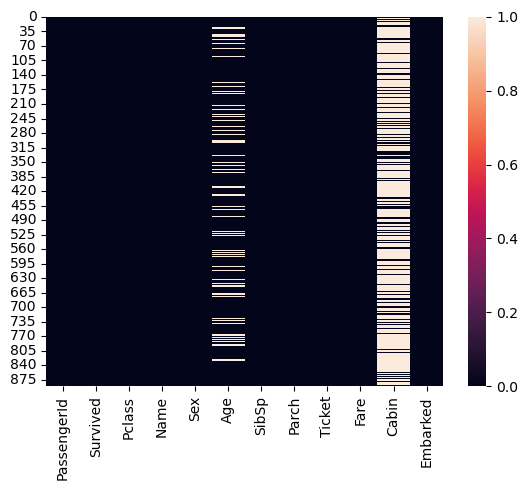

In [41]:
sns.heatmap(df.isna());

**Bar plots**

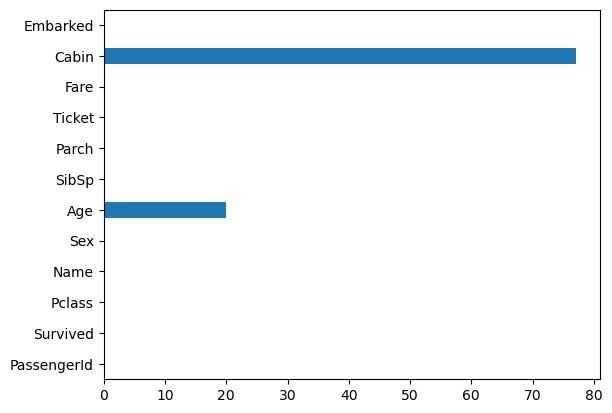

In [42]:
df.isna().mean().multiply(100).round(1).plot(kind = 'barh');

## Imputation 

Imputation means we will fill the missing values. The treatment can be simple, using mean or median values or you can also take the help of a machine learning methods to do this. It will also vary for categorical and numerical values

Pandas functions for missing value treatment are: 

* [`df.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)- Most commonly used method. 
* [`df.ffill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html)
* [`df.bfill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html)

### Simple Imputations

#### Numerical column imputation

In [43]:
df1 = df.copy()

In [44]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Understanding the summary value of the age column**

In [45]:
mean_age = df['Age'].mean().round(1)

#median
median_age = df['Age'].median()

print(f"The mean age of the titanic passengers is {mean_age}")
print(f"The median age of the titanic passengers is {median_age}")

The mean age of the titanic passengers is 29.7
The median age of the titanic passengers is 28.0


There is ~2 years of difference between mean and median age, which one should we choose? It often depends on data skew. If the data is skewed, its better to use `median` rather than `mean`. 

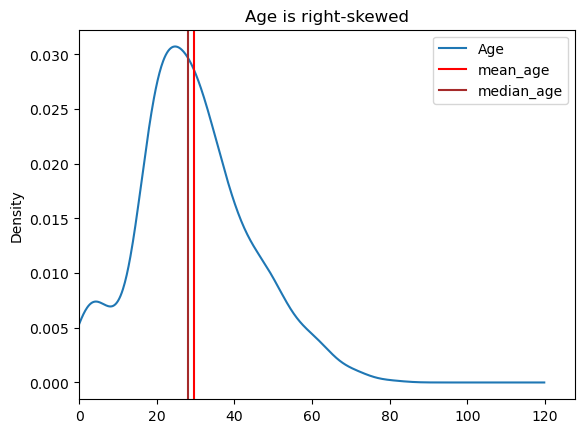

In [46]:
df['Age'].plot(kind = 'kde', xlim = 0, title = "Age is right-skewed");

plt.axvline(df['Age'].mean(), color = 'red', label = "mean_age")
plt.axvline(df['Age'].median(), color = 'brown', label = "median_age")

plt.legend();

I will create a copy of the original dataframe before doing the imputation, so that we can showcase other imputation methods

In [47]:
df1 = df.copy() # create a copy of the df

In [48]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Fill the missing enteries with the median_age**

In [49]:
df1['Age'].fillna(value = median_age, inplace = True)

In [50]:
# recheck the missing values
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Categorical Column Imputations

We have `Embarked` column which is a categorical column and we can't use the mean() or median() methods to impute a categorical columns. However, we can replace a missing value in categorical with the most frequently occuring value, especially when there are only two missing values

The most frequently occuring value can be calculated using the `.mode()` function

In [51]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

`S` is the most frequented value in the table. We can calculate this using `mode()` function

In [52]:
mode_embarked = df['Embarked'].mode()[0] # we have to use [0] otherwise we get a series 
mode_embarked

'S'

In [53]:
df1['Embarked'].fillna(value = mode_embarked, inplace = True)

In [54]:
# recheck the missing values
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

```{note}

`Cabin` column is a tricky one. First of all it has 77% missing values and also, there is no clear way we can fill in this missing value. It is just a label of the cabins. Secondly, it won't be useful for any data analysis that we plan for Titanic data, hence we can drop the whole column. 

```

In [55]:
df1 = df1.drop(columns = "Cabin", axis = 1)

In [56]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Hence with the simple imputation methods we are able to impute all the missing values

### ML based Imputation

**Please focus on this section when you cover the ML topics**

In [57]:
df2 = df.copy() # creating a copy from the original dataset

In [58]:
df2_numeric = df2.select_dtypes(['float', 'int']).drop(columns = "PassengerId", axis = 1)

In [59]:
df2_numeric.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

**Initiating the imputer**

In [60]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

In [61]:
# imputed values output
imputed_matrix = imputer.fit_transform(df2_numeric)

**Convert the output into a pandas dataframe**

In [62]:
df2_numeric_imputed = pd.DataFrame(imputed_matrix, columns = df2_numeric.columns)

In [63]:
df2_numeric_imputed.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [64]:
df2_numeric_imputed['Age'].mean()

30.149741863075196

## 📚References


* [Imputation of Sklearn](https://scikit-learn.org/stable/modules/impute.html)

* [Imputing missing values before building an estimator](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

* [Pandas filling and dropping](https://medium.com/@sagnikkundu25/the-pandas-fillna-and-dropna-methods-1fecad724aa9)

* [K-nn imputation](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)